### M\oller for simplified model

In [1]:
import sys, os
sys.path.insert(0, 'core/')
import numpy as np
from matplotlib import pyplot as plt
from wave_pack import convolution, delay
from wave_pack import inverse_pulse as pulse
from wave_pack import efficiency

def get_resolventa(noa, omega, hg, ddRight):
    res_inv = np.eye(noa)*(omega + 0.25j)  #0.25j * (np.ones((noa,noa)))
    ddr2 = np.zeros_like(ddRight)
    k=0
    for i in range(noa):
        for j in range(noa):
            if i==j:
                continue
            res_inv[i,j] = 0.25j * np.exp(1j*np.pi*(abs(i-j)+hg*omega*abs(i-j)))
            
        
        if ddRight[i] == 1:
            k+=1
            ddr2[i] = np.exp(-1j*np.pi*(k+0*hg*omega*k))
            
    
    return np.linalg.solve(res_inv, ddr2)

def normplot(x,y,*args,**kwargs):
    plt.plot(x, y/y.max()/0.8, *args, **kwargs)

In [2]:
nof = 1200
noa = 100
ddRight = np.zeros(noa, dtype=np.complex)
AtomicDecay = np.zeros((noa, nof), dtype=np.complex)
freq = np.linspace(-2400, 2400, nof)
hgg = 1/1000

for i in range(noa):
    if i >= noa//5 and i < noa - noa//5:
        ddRight[i] = 1.
    else:
        ddRight[i] = 0.

for i,om in enumerate(freq):
        AtomicDecay[:, i] = get_resolventa(noa, om, hgg, ddRight)

smD = np.zeros_like(AtomicDecay)
for i in range(noa):
    t, smD[i, :] = convolution(freq, AtomicDecay[i, :], np.ones_like(freq))
    
sidemDecay4 = np.real(np.dot(np.conj(np.transpose(smD)), smD).diagonal())

natoms = range(1,noa+1)

fstatei = abs(smD[:, nof//2])
fstatef = abs(smD[:, -1])

smD = np.zeros_like(AtomicDecay)
for i in range(noa):
    if i>=noa//3 and i < noa - noa//3:
        t, smD[i, :] = convolution(freq, AtomicDecay[i, :], np.ones_like(freq))

sidemDecay5 = np.real(np.dot(np.conj(np.transpose(smD)), smD).diagonal())




In [3]:
nof = 1200
noa = 34
ddRight = np.zeros(noa, dtype=np.complex)
AtomicDecay = np.zeros((noa, nof), dtype=np.complex)
freq = np.linspace(-2400, 2400, nof)

for i in range(noa):
    if i >= noa//3 and i < noa - noa//3:
        ddRight[i] = 1.
    else:
        ddRight[i] = 1.
for i,om in enumerate(freq):
        AtomicDecay[:, i] = get_resolventa(noa, om, hgg, ddRight)

smD = np.zeros_like(AtomicDecay)
for i in range(noa):
    t, smD[i, :] = convolution(freq, AtomicDecay[i, :], np.ones_like(freq))
    
sidemDecay2 = np.real(np.dot(np.conj(np.transpose(smD)), smD).diagonal())


In [4]:
#plt.plot(t, sidemDecay1/sidemDecay1.max())
plt.plot(t, sidemDecay2/sidemDecay2.max())
#plt.plot(t, sidemDecay3/sidemDecay3.max())
plt.plot(t, sidemDecay4/sidemDecay4.max())
#plt.plot(t, sidemDecay5/sidemDecay5.max())

#plt.plot(t, sidemDecay3/sidemDecay3.max()/0.79)
#plt.yscale('log')
plt.xlim(0,t.max())
plt.xlim(0,0.9)
#plt.ylim(0.01, 1)
plt.show()

NameError: name 'sidemDecay1' is not defined

In [ ]:
plt.plot(natoms, fstatei, 'go')
plt.plot(natoms, fstatef, 'bo')
#plt.plot(natoms, abs(ddRight), 'ro')
plt.show()

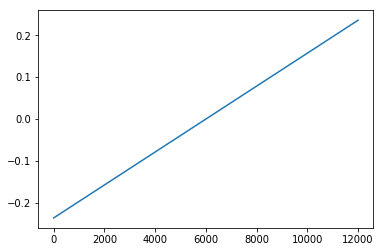

In [147]:
plt.plot(t)

In [100]:
print(ddRight)

[ 1.        +0.j         -0.9971589 -0.07532681j  0.98865174+0.15022559j
 -0.97452687-0.22427076j  0.95486454+0.29704158j -0.92977649-0.36812455j
  0.89940525+0.43711577j -0.86392342-0.5036232j   0.8235326 +0.56726895j
 -0.7784623 -0.62769136j  0.72896863+0.68454711j -0.67533281-0.73751312j
  0.61785961+0.78628843j -0.55687562-0.8305959j   0.49272734+0.87018375j
 -0.42577929-0.90482705j  0.35641188+0.93432894j -0.28501926-0.95852179j
  0.21200711+0.97726812j -0.13779029-0.99046143j  0.06279052+0.99802673j
  0.01256604-0.99992104j -0.0878512 +0.99613361j  0.16263717-0.98668594j
 -0.236499  +0.97163173j  0.30901699-0.95105652j -0.3797791 +0.92507721j
  0.44838322-0.89384142j -0.51443953+0.85752666j  0.5775727 -0.81633925j
 -0.63742399+0.77051324j  0.69365331-0.72030902j -0.74594115+0.66601187j
  0.7939904 -0.6079303j ]
